In [6]:
import pandas as pd
import numpy as np
import csv

In [7]:
google_data = pd.read_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\GOOGL.csv')
google_data

,Date,Open,High,Low,Close,Volume
0,04-Jan-16,775.50,775.50,747.54,759.00,23798
1,05-Jan-16,759.00,769.20,755.65,761.53,15959
2,06-Jan-16,753.57,765.73,748.00,760.40,16789
3,07-Jan-16,740.00,755.31,735.28,741.45,22332
4,08-Jan-16,752.49,756.25,728.92,730.91,16494
5,11-Jan-16,732.50,736.00,719.56,734.56,18012
6,12-Jan-16,733.99,748.34,733.99,744.51,15821
7,13-Jan-16,749.43,753.00,716.78,719.57,18036
8,14-Jan-16,719.00,739.89,705.00,731.03,19290
9,15-Jan-16,720.00,724.16,701.51,710.49,26729


In [13]:
google_series = google_data[['Date','Close']]

In [14]:
from pandas import Series
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = Series.from_csv('E:\\Information Systems\\FinanceML\\Data\\Equity_Group\\GOOGL_series.csv', header=0)
# prepare situation
X = series.values
window = 10
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
spread_high = list()
spread_low = list()
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=739.345000, expected=719.080000
predicted=735.353000, expected=719.780000
predicted=731.178000, expected=726.670000
predicted=727.805000, expected=747.000000
predicted=728.360000, expected=733.750000
predicted=728.644000, expected=731.800000
predicted=728.368000, expected=739.000000
predicted=727.817000, expected=740.010000
predicted=729.861000, expected=765.030000
predicted=733.261000, expected=803.500000
predicted=742.562000, expected=782.450000
predicted=748.899000, expected=752.000000
predicted=752.121000, expected=726.380000
predicted=752.092000, expected=700.670000
predicted=747.459000, expected=702.000000
predicted=744.284000, expected=702.650000
predicted=741.369000, expected=706.800000
predicted=738.149000, expected=706.390000
predicted=734.787000, expected=706.920000
predicted=728.976000, expected=718.750000
predicted=720.501000, expected=732.110000
predicted=715.467000, expected=717.560000
predicted=712.023000, expected=721.950000
predicted=711.580000, expected=729

C:\Users\TEJESH\Anaconda3\lib\site-packages\pandas\core\series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


In [16]:
std_dev = np.std(google_data['Close'])
print("std  : ", std_dev)
spread = std_dev*0.05
print(spread)
std_high = [spread + predictions[i] for i in range(len(predictions))]
std_low = [predictions[i] - spread for i in range(len(predictions))]

std  :  130.37618646676765
6.518809323338383


Test RMSE: 24.115


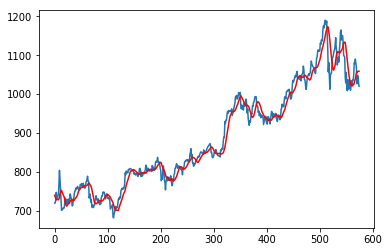

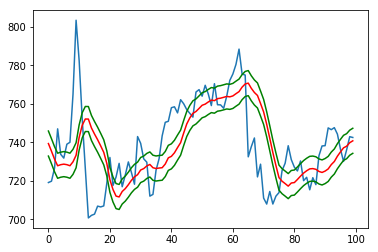

In [17]:
error = mean_squared_error(test, predictions)
rootmse = np.sqrt(error)
print('Test RMSE: %.3f' % rootmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[0:100])
pyplot.plot(predictions[0:100], color='red')
pyplot.plot(std_high[0:100], color = 'green')
pyplot.plot(std_low[0:100], color = 'green')
pyplot.show()
